In [ ]:
import pandas as pd
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [ ]:
max_features = 10000
max_len = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure equal length
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000, 500), (25000,), (25000, 500), (25000,))

In [9]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=False)) 
model.add(Dropout(0.5))  # 50% dropout
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

c:\Users\PMYLS\Downloads\Machine-Learning-Projects\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=5,
                    validation_split=0.2,
                    verbose=2)

Epoch 1/5
157/157 - 320s - 2s/step - accuracy: 0.7315 - loss: 0.5306 - val_accuracy: 0.8428 - val_loss: 0.3711
Epoch 2/5
157/157 - 200s - 1s/step - accuracy: 0.8551 - loss: 0.3480 - val_accuracy: 0.8476 - val_loss: 0.3605
Epoch 3/5
157/157 - 201s - 1s/step - accuracy: 0.8726 - loss: 0.3244 - val_accuracy: 0.8324 - val_loss: 0.3957
Epoch 4/5
157/157 - 208s - 1s/step - accuracy: 0.8938 - loss: 0.2806 - val_accuracy: 0.8392 - val_loss: 0.4006
Epoch 5/5
157/157 - 246s - 2s/step - accuracy: 0.9073 - loss: 0.2443 - val_accuracy: 0.8368 - val_loss: 0.3981


In [11]:
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 96ms/step
Accuracy: 0.83536
              precision    recall  f1-score   support

           0       0.82      0.87      0.84     12500
           1       0.86      0.80      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



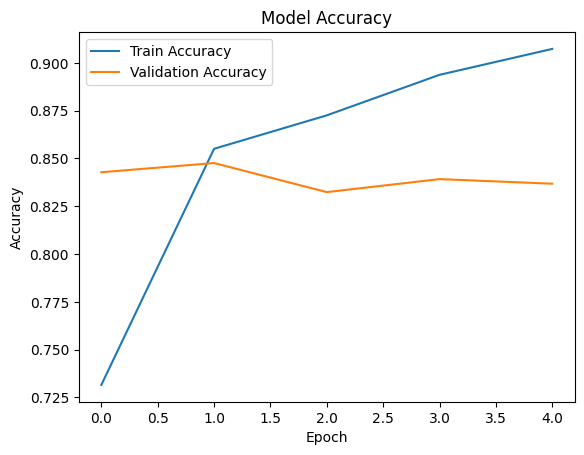

In [15]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
def predict_sentiment(text):

    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.word_index = imdb.get_word_index()

    seq = tokenizer.texts_to_sequences([text])
    pad_seq = sequence.pad_sequences(seq, maxlen=max_len)
    prediction = model.predict(pad_seq)[0][0]
    
    print(f"Positive Probability: {prediction:.2f}")
    return "Positive" if prediction > 0.5 else "Negative"

In [33]:
review = "This movie was fantastic! I loved every moment of it."
print(predict_sentiment(review))

review = "This show is a complete disappointment. The title song is painfully tacky and feels entirely out of place for a series that claims to be about royalty. It’s clear they were trying way too hard to create a Western-style track, which I would’ve applauded if the execution had been better. Unfortunately, the result is underwhelming and fails to capture the elegance or grandeur expected of a royal theme."
print(predict_sentiment(review))

review = "Bakwas movie! Complete rubbish and unrealistic! Don't waste your time and money on this garbage. The only reason this movie was made was because the director had an incident in his own life and decided to make a movie on it. Woman gets slapped by husband and wants divorce. Focus of the movie is on how the woman is the one who sacrificed her career and goals to maintain the relationship for the sake of her husband."
print(predict_sentiment(review))

review = "This movie was incredibly engaging, with a gripping storyline that kept me on the edge of my seat. The twists and unexpected surprises added layers of intrigue, making me eager to discover what would happen next. I highly recommend it to anyone who enjoys a compelling mystery thriller it’s a true rollercoaster of suspense and excitement."
print(predict_sentiment(review))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Positive Probability: 0.80
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Positive Probability: 0.02
Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Positive Probability: 0.03
Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Positive Probability: 0.97
Positive


In [34]:
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review if i >= 3])

samples = X_test[:5]
predictions = model.predict(samples)

decoded_reviews = [decode_review(sample) for sample in samples]
predicted_sentiments = ["Positive" if pred[0] > 0.5 else "Negative" for pred in predictions]

df_results = pd.DataFrame({
    "Review": decoded_reviews,
    "Predicted Sentiment": predicted_sentiments
})

df_results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


,Review,Predicted Sentiment
0,please give this one a miss br br and the rest...,Negative
1,this film requires a lot of patience because i...,Positive
2,at a time when motion picture animation of all...,Positive
3,i generally love this type of movie however th...,Negative
4,like some other people wrote i'm a die hard ma...,Positive
